In [134]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [135]:
td_filepath = r"C:\Users\npilyugina\Desktop\Repo\ml-intro\2_data_exploration\train.csv"
td = pd.read_csv(td_filepath, index_col="PassengerId")
td

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


# Context

# Data quality assessment

Checking for NA values across the dataset

<AxesSubplot:xlabel='PassengerId'>

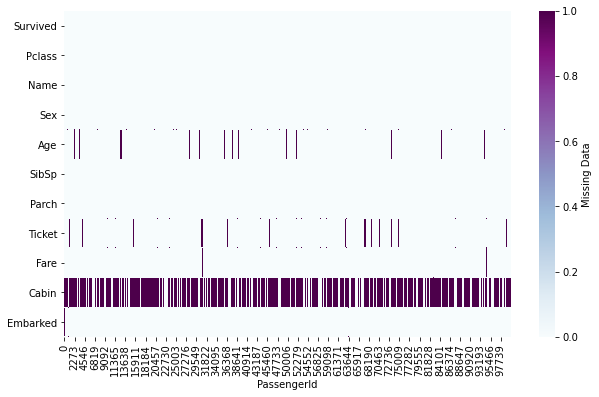

In [136]:
plt.figure(figsize=(10,6))
sns.heatmap(td.isna().transpose(),
            cmap="BuPu",
            cbar_kws={'label': 'Missing Data'})

<Figure size 720x432 with 0 Axes>

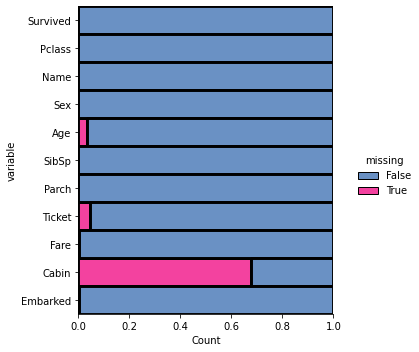

In [137]:
plt.figure(figsize=(10,6))
sns.displot(
    data=td.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette = sns.color_palette('Accent')[4:6],
    multiple="fill"
)

Values distribution and NA values fix

Text(0.5, 1.0, 'Sex distribution')

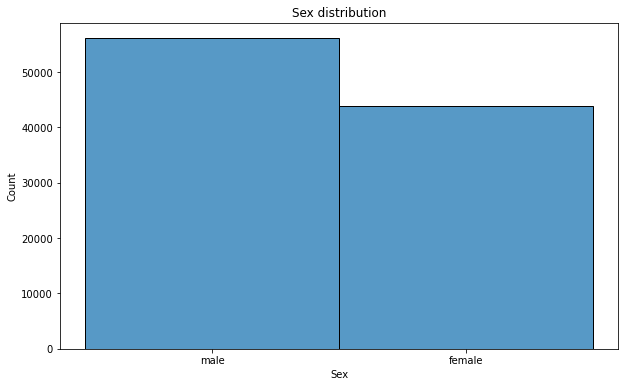

In [138]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Sex')
plt.title("Sex distribution")

Text(0.5, 1.0, 'Class distribution')

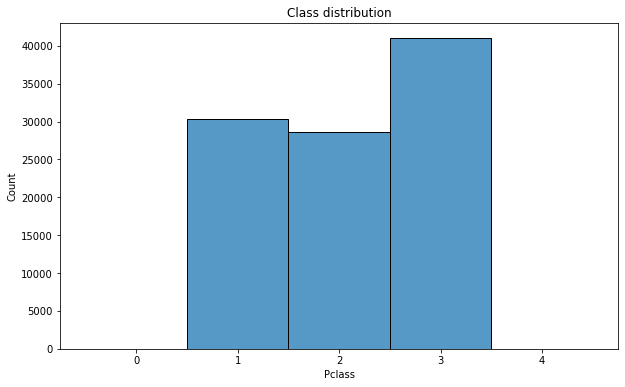

In [139]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Pclass', bins=np.arange(6)-0.5)
plt.title("Class distribution")

Text(0.5, 1.0, 'Survival distribution')

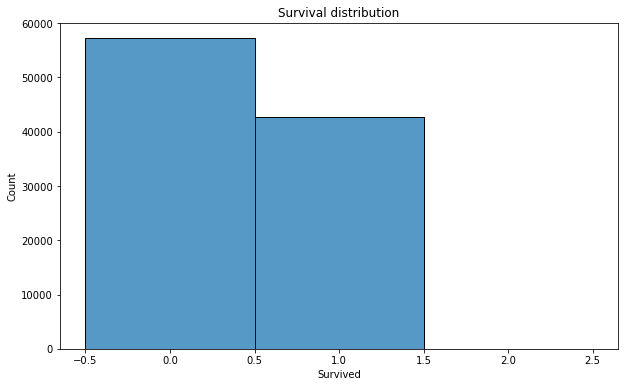

In [140]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Survived', bins=np.arange(4)-0.5)
plt.title("Survival distribution")

Text(0.5, 1.0, 'Port of Embarkation distribution')

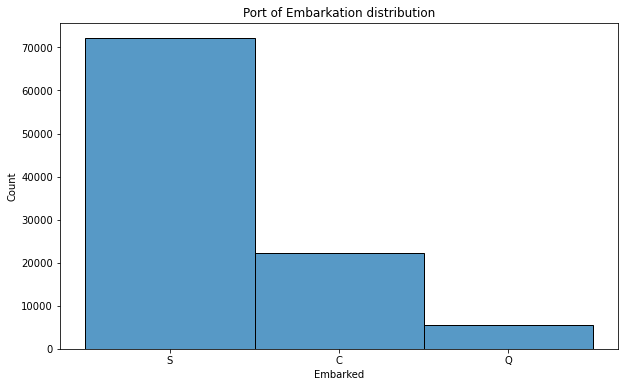

In [141]:
plt.figure(figsize=(10,6))
tdemb = td[td['Embarked'].notnull()]
sns.histplot(data=tdemb, x='Embarked')
plt.title("Port of Embarkation distribution")

Fill NA for Embarked with the most common value - S

In [142]:
td['Embarked'] = td['Embarked'].fillna('S')

Fill NA for Age with the mean value

In [143]:
a = td['Age'].mean()
td['Age'] = td['Age'].fillna(a)

Text(0.5, 1.0, 'Age distribution')

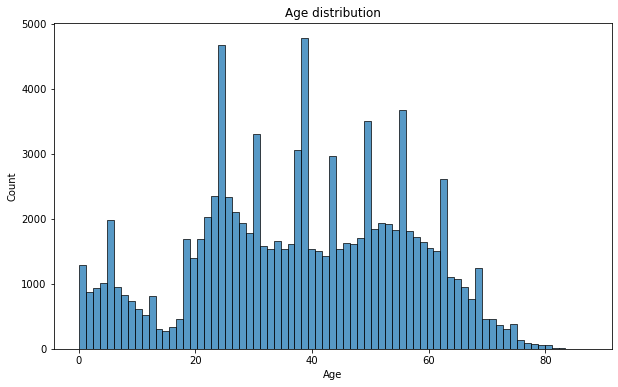

In [144]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Age')
plt.title("Age distribution")

Fill NA for Fare with the mean value

In [145]:
a = td['Fare'].mean()
td['Fare'] = td['Fare'].fillna(a)

Text(0.5, 1.0, 'Fare distribution')

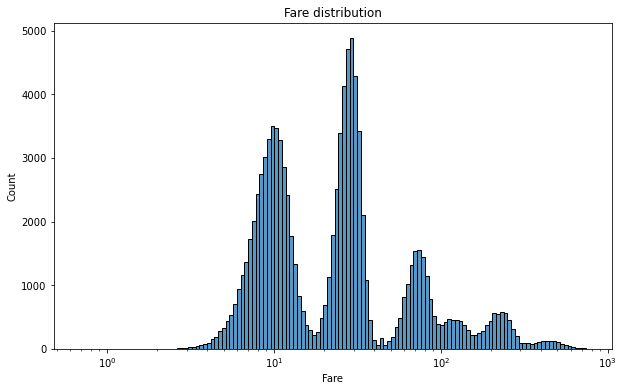

In [167]:
plt.figure(figsize=(10,6))
sns.histplot(data=td, x='Fare',log_scale=True)
plt.title("Fare distribution")

Get the Cabin level for non NA values

In [154]:
tdcab = td[td['Cabin'].notnull()]
tdcablvl = tdcab['Cabin'].astype(str).str[0]
tdcab.insert(len(tdcab.columns), 'cablvl', tdcablvl.values)

In [148]:
# tdcab['cablvl'] = pd.Categorical(td['cablvl'], ['A','B','C','D','E','F','G','T'])

Text(0.5, 1.0, 'Cabin level distribution')

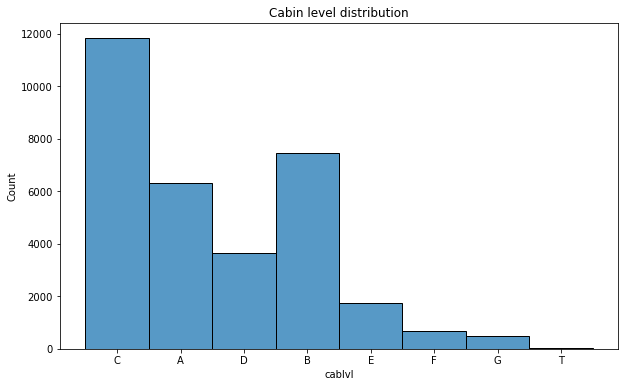

In [155]:
plt.figure(figsize=(10,6))
sns.histplot(data=tdcab, x='cablvl')
plt.title("Cabin level distribution")

In [188]:
tdcab.groupby(['cablvl']).size()

cablvl
A     6307
B     7439
C    11825
D     3637
E     1749
F      663
G      482
T       32
dtype: int64

Level 'T' seems to be a data error? Could not find info on level T online

In [ ]:
tdcabfilled = td
tdcabfilled['Cabin'] = td['Cabin'].fillna('Z')
tdcabfilledlvl = tdcabfilled['Cabin'].astype(str).str[0]
tdcabfilled.insert(len(tdcabfilled.columns), 'cablvl', tdcabfilledlvl.values)

In [200]:
tdcabfilled

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cablvl
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,38.355472,2,0,209245,27.14,C12239,S,C
1,0,3,"Bryan, Drew",male,38.355472,0,0,27323,13.35,Z,S,Z
2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,Z,S,Z
3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,Z,S,Z
4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,Z,S,Z
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.000000,0,0,PC 15008,14.86,D17243,C,D
99996,0,2,"Brown, Herman",male,66.000000,0,0,13273,11.15,Z,S,Z
99997,0,3,"Childress, Charles",male,37.000000,0,0,NaN,9.95,Z,S,Z


# Data exploration

<AxesSubplot:xlabel='Sex', ylabel='Count'>

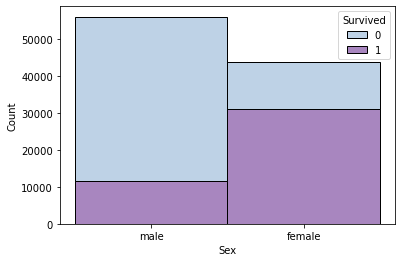

In [160]:
sns.histplot(data=td, stat="count", multiple="stack",
             x="Sex", kde=False,
             palette="BuPu", hue="Survived",
             element="bars", legend=True)

Women have higher survival rate, makes sense since the crew was ordered to evacuate women and children first.

<AxesSubplot:xlabel='Age', ylabel='Count'>

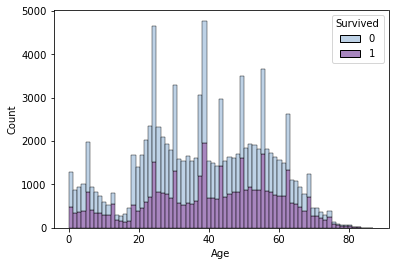

In [161]:
sns.histplot(data=td, stat="count", multiple="stack",
             x="Age", kde=False,
             palette="BuPu", hue="Survived",
             element="bars", legend=True)

Age does not affect the survival rate, even though the crew was ordered to evacuate women and _children_ first.

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

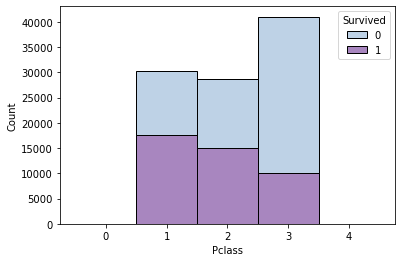

In [163]:
sns.histplot(data=td, stat="count", multiple="stack",
             x="Pclass", kde=False,
             palette="BuPu", hue="Survived",
             element="bars", legend=True, bins=np.arange(6)-0.5)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

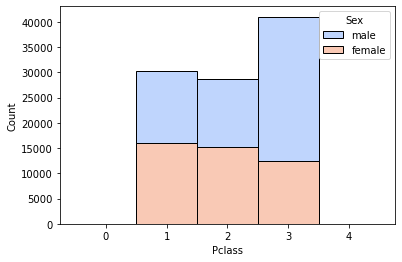

In [165]:
sns.histplot(data=td, stat="count", multiple="stack",
             x="Pclass", kde=False,
             palette="coolwarm", hue="Sex",
             element="bars", legend=True, bins=np.arange(6)-0.5)

First class passengers have higher survival rate, but the distribution of female/male passengers and the distribution of living/deceased passengers in relations to socio-economic status is similar.

<AxesSubplot:xlabel='cablvl', ylabel='Count'>

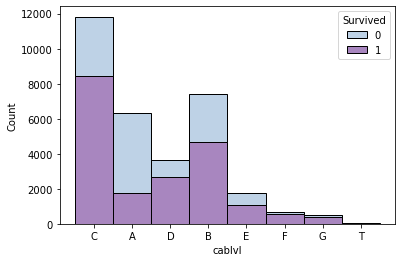

In [182]:
sns.histplot(data=tdcab, stat="count", multiple="stack",
             x="cablvl", kde=False,
             palette="BuPu", hue="Survived",
             element="bars", legend=True)

<AxesSubplot:xlabel='cablvl', ylabel='Count'>

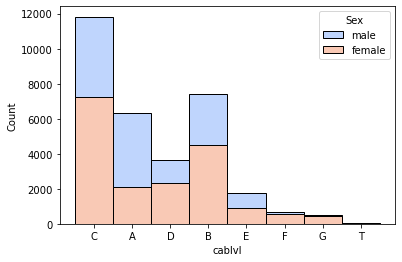

In [189]:
sns.histplot(data=tdcab, stat="count", multiple="stack",
             x="cablvl", kde=False,
             palette="coolwarm", hue="Sex",
             element="bars", legend=True)

For data with known cabin number and level the highest level has the least number of survivals. The survival rate according to cabin level is again linked to the sex distribution among levels. Because of this we can say that the cabin level did not significantly affect the survival rate.  

<AxesSubplot:xlabel='cablvl', ylabel='Count'>

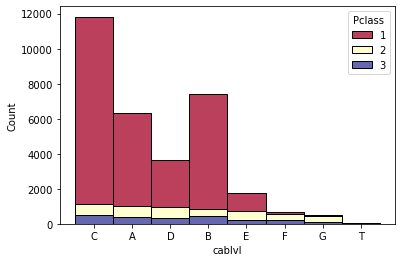

In [181]:
sns.histplot(data=tdcab, stat="count", multiple="stack",
             x="cablvl", kde=False,
             palette="RdYlBu", hue="Pclass",
             element="bars", legend=True)

If we know the cabin number and level, the passenger was likely in the first class. There were first class passengers on most levels, skewing towards the top levels.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

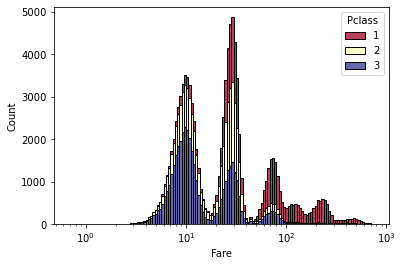

In [175]:
sns.histplot(data=td, stat="count", multiple="stack",
             x="Fare", kde=False,
             palette="RdYlBu", hue="Pclass",log_scale=True,
             element="bars", legend=True)

<AxesSubplot:xlabel='cablvl', ylabel='Count'>

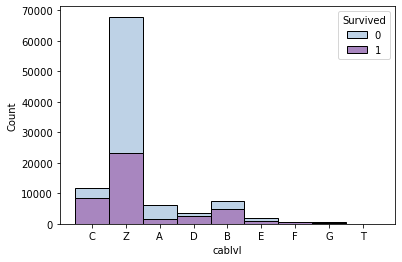

In [205]:
sns.histplot(data=tdcabfilled, stat="count", multiple="stack",
             x="cablvl", kde=False,
             palette="BuPu", hue="Survived",
             element="bars", legend=True)

Z - level if the cabin number is missing - has the highest death rate among levels.

# Summary

Age does not affect the survival rate, even though the crew was ordered to evacuate women and _children_ first. 
Women have higher survival rate, which makes sense according to the given orders.
First class passengers have higher survival rate, but the distribution of female/male passengers and the distribution of living/deceased passengers in relations to socio-economic status is similar.
For data with known cabin number top levels have less survivals, but the survival rate is again linked to the sex distribution among levels. Because of this we can say that the cabin level did not significantly affect the survival rate.
If we do not have info about cabin number, it's likely because the passenger didn't survive.
Overall we have an unexpectedly high survival rate(?)